# Comparação entre a utilização de CNN e MLP para classificação de imagens do dataset Fashion MNIST

Neste simples e rápido projeto eu quis trazer uma comparação de resultados entre dois modelos dieferentes para classificação de imagens do conhecido dataset Fashion MNIST. Será comparado perda e acurácia entre os dois modelos.

- Importando as bibliotecas à serem utilizadas

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

- Carregando e separando os dados entre Treino, Validação e Teste.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist


(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Conferindo o tamanho do dataset de treino e teste
print(X_train_full.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


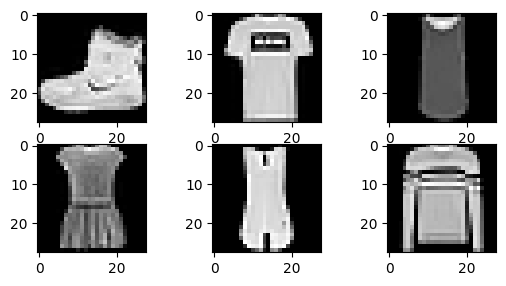

In [4]:
# Plotando algumas imagens do dataset

for i in range(6):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train_full[i], cmap='gray')
plt.show()

In [5]:
# Os dataset já é separado entre treino e teste, no entanto não há separação para validação, será feito abaixo.
# Também será escalonado dividindo por 255 (técnica de normalização dos dados, que os colocará dentro de um range de 0 e 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

- O target do modelo (y) possui 10 categorias numerados de 1 a 10, cada número é uma classe diferente. Abaixo iremos definir quais classes são essas

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Exemplo dos nomes das classes das imagens plotadas anteriormente:

for i in range(6):
  print(class_names[y_train_full[i]])

Ankle Boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover


## Criando o modelo de Rede Neural MLP (Multi Layer Perceptron)

- Criando a arquitetura da rede

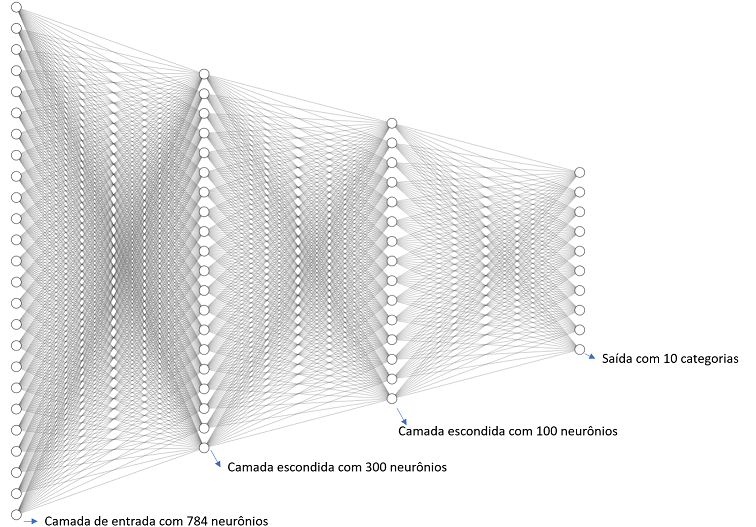

In [19]:
model_mlp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
# Abaixo é possível confirmar os parâmetros que foram inseridos na criação da arquitetura da rede. Total de parâmetros à serem treinados: 266,610 mil
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Compilando o modelo

In [21]:
model_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- Agora que temos a arquitetura da rede criada e o modelo compilado, podemos enfim treinar com os dados de teste e validar com os dados de validação.

In [22]:
history = model_mlp.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7146 - accuracy: 0.7628 - val_loss: 0.5082 - val_accuracy: 0.8290
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4884 - accuracy: 0.8280 - val_loss: 0.4422 - val_accuracy: 0.8488
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4441 - accuracy: 0.8435 - val_loss: 0.4142 - val_accuracy: 0.8598
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8530 - val_loss: 0.4050 - val_accuracy: 0.8586
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3970 - accuracy: 0.8589 - val_loss: 0.3907 - val_accuracy: 0.8668
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3817 - accuracy: 0.8652 - val_loss: 0.3795 - val_accuracy: 0.8678
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3679 - accuracy: 0.8691 - val_loss: 0.3637 - val_accuracy:

- Abaixo é possível verificar um plot dos valores de perda e acurácia das épocas de treinamento. No final será feita uma comparação com o modelo CNN

In [25]:
# Convertendo os parâmetros do fit do modelo em um dataframe pandas.

params_mlp = pd.DataFrame(history.history)
params_mlp.tail(5)

,loss,accuracy,val_loss,val_accuracy
5,0.381703,0.865182,0.379532,0.8678
6,0.367865,0.869127,0.363667,0.8706
7,0.356379,0.873364,0.367293,0.8668
8,0.347067,0.876473,0.356866,0.8744
9,0.336452,0.880545,0.345433,0.8768


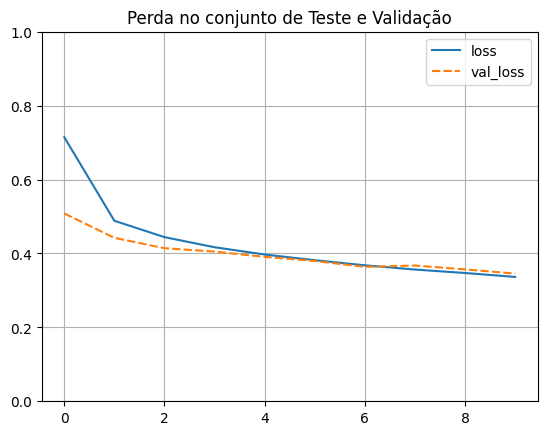

In [27]:
# Gerando um plot para perda

sns.lineplot(params_mlp[['loss', 'val_loss']])
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Perda no conjunto de Teste e Validação")
plt.show()

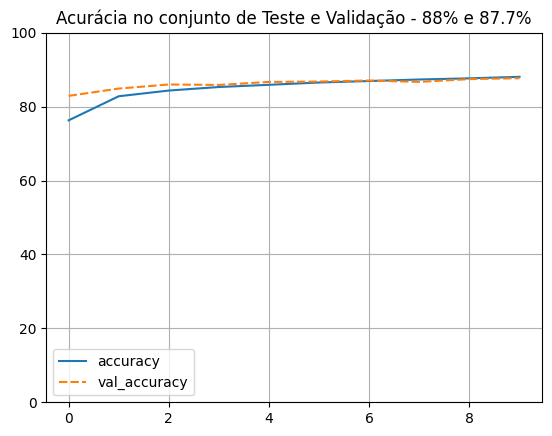

In [34]:
# Gerando um plot para acurácia

sns.lineplot(params_mlp[['accuracy', 'val_accuracy']] * 100)
plt.grid(True)
plt.gca().set_ylim(0,100)
plt.title("Acurácia no conjunto de Teste e Validação - 88% e 87.7%")
plt.show()

- A primeira tentativa foi realizada com 25 épocas, onde foi possível perceber que a partir da época número 10 a perda do conjunto de validação começou a subir enquanto a de treinamento continuava diminuindo, sendo então um indicativo de *overfitting*. No entanto, na segunda tentativa foi reduzido para 10 épocas de treinamento.

In [26]:
# Confirmando o modelo no conjunto de teste, já que o de validação se mostrou satisfatório.

model_mlp.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 69.9755 - accuracy: 0.8330


[69.97553253173828, 0.8330000042915344]

## Criando o modelo de Rede Neural Convolucional (CNN)

Diferentemente da MLP, o modelo de rede neural convolucional utiliza filtros para extrair mapas de características das imagens. Uma vantagem da rede Convolucional em cima da MLP é que a CNN poder ser facilmente usada para imagens maiores, visto que a MLP é uma rede totalmente conectada, o que dificultaria em casos de imagens maiores. No entanto, este dataset possui imagens pequenas (28x28), o que viabiliza também a MLP.

- Criando a arquitetura da rede

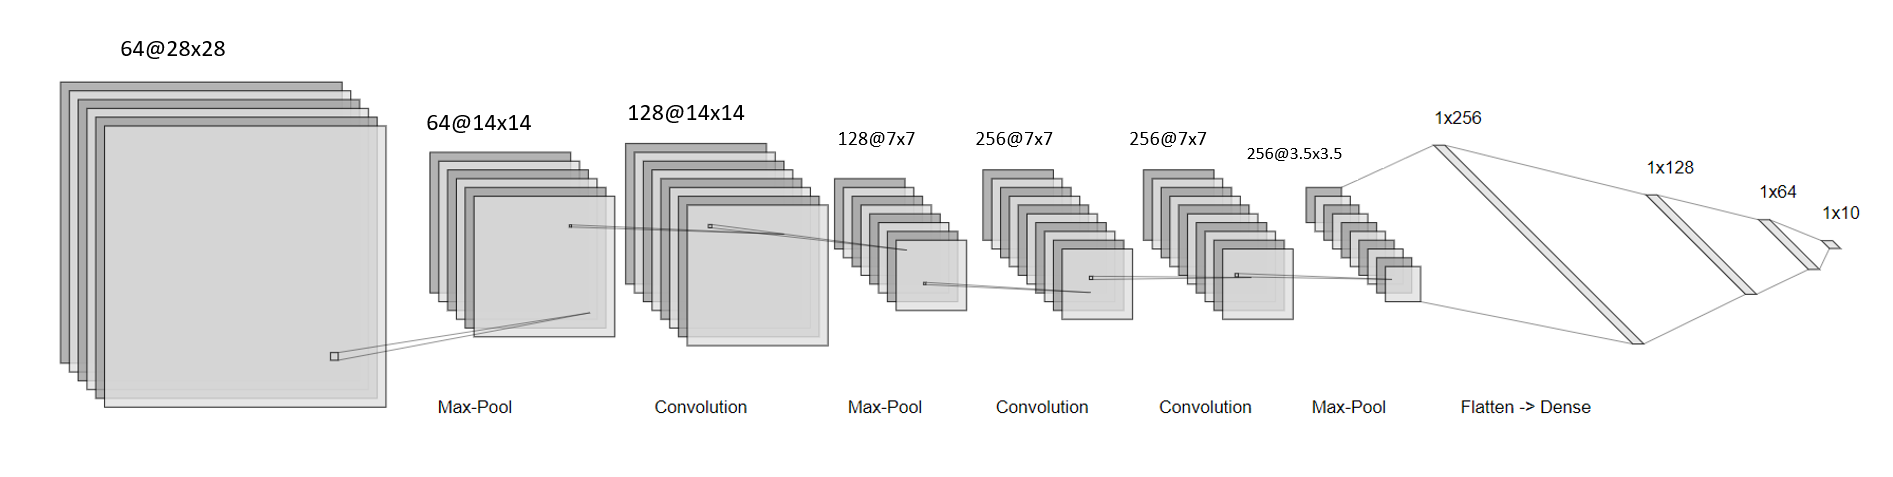

In [36]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [38]:
# Confirmando os parâmetros que foram inseridos na criação da arquitetura da rede. Total de parâmetros à serem treinados: 1,266,250 milhões de parâmetros
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 256)        

- Compilando o modelo

In [39]:
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- Com a arquitetura criada da rede CNN e o modelo compilado, o modelo será treinado.

In [40]:
history_cnn = model_cnn.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 17s 6ms/step - loss: 1.3592 - accuracy: 0.5011 - val_loss: 0.7405 - val_accuracy: 0.7300
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8227 - accuracy: 0.6983 - val_loss: 0.5840 - val_accuracy: 0.7800
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6846 - accuracy: 0.7489 - val_loss: 0.5063 - val_accuracy: 0.8088
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6078 - accuracy: 0.7800 - val_loss: 0.4457 - val_accuracy: 0.8362
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5546 - accuracy: 0.8044 - val_loss: 0.4141 - val_accuracy: 0.8466
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5191 - accuracy: 0.8171 - val_loss: 0.3912 - val_accuracy: 0.8626
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4901 - accuracy: 0.8282 - val_loss: 0.3639 - val_ac

In [41]:
# Convertendo os parâmetros do fit do modelo em um dataframe pandas.

params_cnn = pd.DataFrame(history_cnn.history)
params_cnn.tail(5)

,loss,accuracy,val_loss,val_accuracy
20,0.320356,0.892164,0.286460,0.8932
21,0.310803,0.892691,0.281974,0.8942
22,0.304528,0.893727,0.269230,0.9016
23,0.297131,0.896945,0.276726,0.9002
24,0.289673,0.901600,0.260057,0.9006


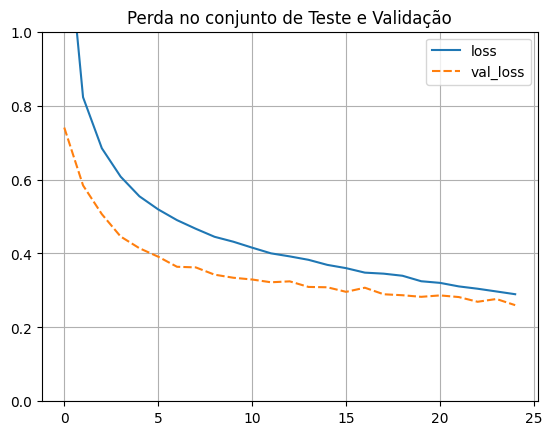

In [42]:
# Gerando um plot para perda

sns.lineplot(params_cnn[['loss', 'val_loss']])
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Perda no conjunto de Teste e Validação")
plt.show()

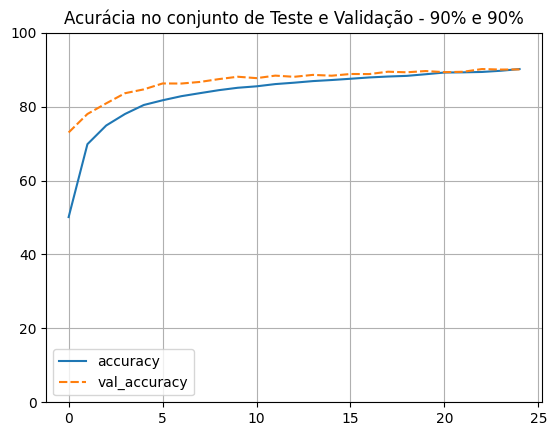

In [44]:
# Gerando um plot para acurácia

sns.lineplot(params_cnn[['accuracy', 'val_accuracy']] * 100)
plt.grid(True)
plt.gca().set_ylim(0,100)
plt.title("Acurácia no conjunto de Teste e Validação - 90% e 90%")
plt.show()

In [47]:
# Confirmando o modelo no conjunto de teste, já que o de validação se mostrou satisfatório.

model_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 32.1602 - accuracy: 0.8564


[32.16020202636719, 0.8564000129699707]

1/1 [==============================] - 0s 122ms/step


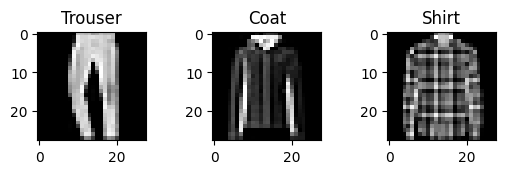

In [72]:
# Prevendo 3 imagens do conjunto de teste (não visto durante treinamento ou validação)

X_new = X_test[5:8]
y_new = y_test[5:8]
y_pred = np.argmax(model_cnn.predict(X_new),axis=1)

for i in range(3):
  plt.subplot(330 + 1 + i)
  plt.title(class_names[y_pred[i]])
  plt.imshow(X_new[i], cmap='gray')
plt.show()

# Comparação dos resultados entre os dois modelos

### **Perda na validação** - No modelo MLP após as 10 épocas foi obtida uma perda de 0.34, enquanto no modelo CNN após as 25 épocas foi obtida uma perda de 0.26.

### **Acurácia na validação** - No modelo MLP após as 10 épocas foi obtida uma acurácia de 87.7%, enquanto no modelo CNN após as 25 épocas foi obtida uma acurácia de 90%, ganho de 2.3%.

### **Acurácia no conjunto de teste** - No modelo MLP após as 10 épocas foi obtida uma acurácia de 83.3%, enquanto no modelo CNN após as 25 épocas foi obtida uma acurácia de 85.6%, ganho de 2.3%.

# Modelo Vencedor - > Rede Neural Convolucional